# causal discovery

In [1]:
# Imports
import numpy as np
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline     
## use `%matplotlib notebook` for interactive figures
# plt.style.use('ggplot')
import sklearn

import tigramite
from tigramite import data_processing as pp
from tigramite.toymodels import structural_causal_processes as toys

from tigramite import plotting as tp
from tigramite.pcmci import PCMCI
from tigramite.lpcmci import LPCMCI

from tigramite.independence_tests.parcorr import ParCorr
from tigramite.independence_tests.robust_parcorr import RobustParCorr
from tigramite.independence_tests.parcorr_wls import ParCorrWLS 
from tigramite.independence_tests.gpdc import GPDC
from tigramite.independence_tests.cmiknn import CMIknn
from tigramite.independence_tests.cmisymb import CMIsymb
from tigramite.independence_tests.gsquared import Gsquared
from tigramite.independence_tests.regressionCI import RegressionCI

## import data

In [2]:
df = pd.read_excel('df_saa.xlsx')

## input specifications

In [3]:
df['dau_net_new_diff'] = df.dau_net_new.diff()
df['subscribers_active_total_diff'] = df.subscribers_active_total.diff()
df = df.iloc[1:,:]

In [4]:
target = 'subscribers_active_total'
bht = ['aa_prompted_percent_14_44',
       'ba_prompted_percent_14_44', 'ba_spontaneous_percent_14_44',
       'ba_top_of_mind_percent_14_44', 'consid_percent_14_44',
       'brand_preference_percent_14_44']
factors_for_analyse = bht + [target]

In [5]:
if target == 'dau_net_new_diff' or target == 'dau_net_new':
    date_start_dau_net_new = '2d5'
    df = df[df.date.ge(date_start_dau_net_new)]


# Initialize dataframe object, specify time axis and variable names
var_names = factors_for_analyse #[r'$X^0$', r'$X^1$', r'$X^2$', r'$X^3$']
dataframe = pp.DataFrame(data = df[factors_for_analyse].values,
                        var_names=var_names)

In [6]:
parcorr = ParCorr(significance='analytic')
pcmci = PCMCI(
    dataframe=dataframe, 
    cond_ind_test=parcorr,
    verbosity=1)

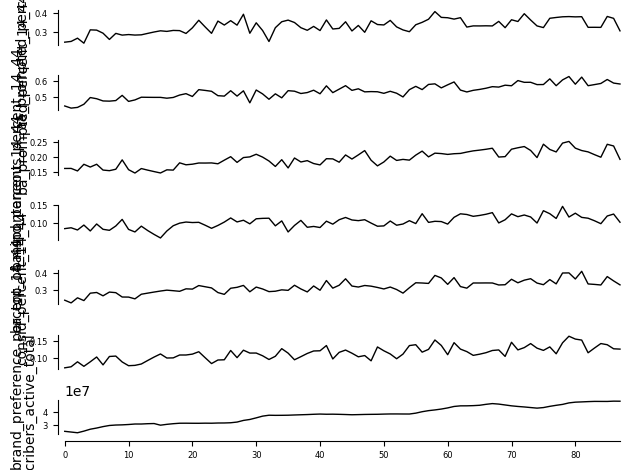

In [7]:
tp.plot_timeseries(dataframe)
plt.show()


##
## Estimating lagged dependencies 
##

Parameters:

independence test = par_corr
tau_min = 0
tau_max = 20


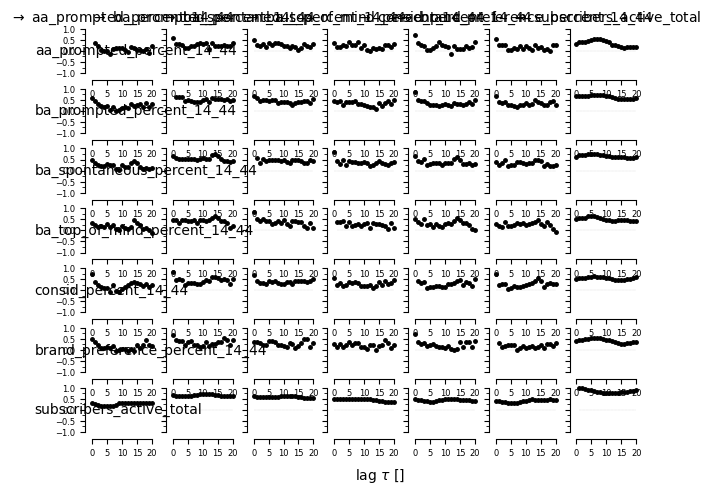

In [8]:
correlations = pcmci.get_lagged_dependencies(tau_max=20, val_only=True)['val_matrix']
lag_func_matrix = tp.plot_lagfuncs(val_matrix=correlations, 
                                   setup_args={'var_names':var_names, 
                                   'x_base':5, 'y_base':.5}); plt.show()

In [9]:
pcmci.verbosity = 1
results = pcmci.run_pcmci(tau_max=8, pc_alpha=None, alpha_level=0.01)


##
## Step 1: PC1 algorithm for selecting lagged conditions
##

Parameters:
independence test = par_corr
tau_min = 1
tau_max = 8
pc_alpha = [0.05, 0.1, 0.2, 0.3, 0.4, 0.5]
max_conds_dim = None
max_combinations = 1



## Resulting lagged parent (super)sets:

    Variable aa_prompted_percent_14_44 has 2 link(s):
    [pc_alpha = 0.2]
        (consid_percent_14_44 -7): max_pval = 0.12211, |min_val| =  0.188
        (aa_prompted_percent_14_44 -1): max_pval = 0.19190, |min_val| =  0.158

    Variable ba_prompted_percent_14_44 has 11 link(s):
    [pc_alpha = 0.5]
        (subscribers_active_total -8): max_pval = 0.11146, |min_val| =  0.201
        (ba_top_of_mind_percent_14_44 -8): max_pval = 0.13606, |min_val| =  0.187
        (ba_prompted_percent_14_44 -2): max_pval = 0.14320, |min_val| =  0.179
        (ba_prompted_percent_14_44 -3): max_pval = 0.22772, |min_val| =  0.154
        (brand_preference_percent_14_44 -1): max_pval = 0.26050, |min_val| =  0.145
        (aa_prompted_percent_14_44

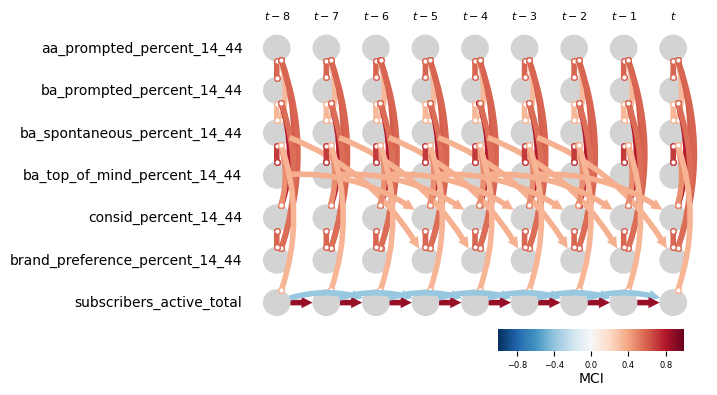

In [10]:
tp.plot_time_series_graph(
    figsize=(6, 4),
    val_matrix=results['val_matrix'],
    graph=results['graph'],
    var_names=var_names,
    link_colorbar_label='MCI',
    ); plt.show()

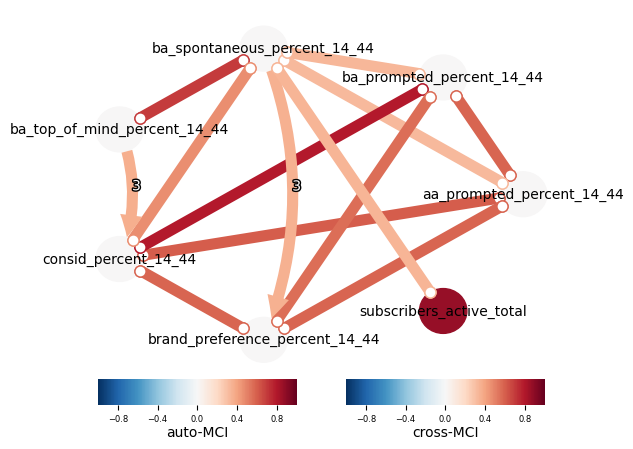

In [11]:
tp.plot_graph(
    val_matrix=results['val_matrix'],
    graph=results['graph'],
    var_names=var_names,
    link_colorbar_label='cross-MCI',
    node_colorbar_label='auto-MCI',
    ); plt.show()